## Mobility of a sedimenting lattice as a function of volume fraction


In [16]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt 
import numpy as np
import pystokes, os, sys
import pyforces

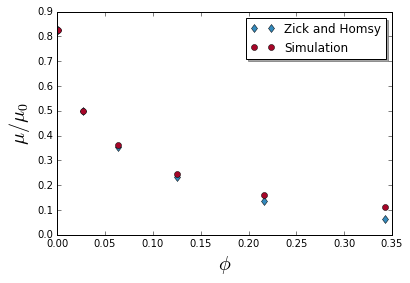

In [19]:
#Parameters
a, eta, dim = 1.0, 1.0/6, 3
Np, Nb, Nm = 1, 1, 6
ta =(4*np.pi/3)**(1.0/3) 
L = ta/np.asarray([0.1, 0.3, 0.4, 0.5, 0.6, 0.7])

#Memory allocation
v = np.zeros(dim*Np)         
r = np.zeros(dim*Np)        
F = np.zeros(dim*Np)  
vv  = np.zeros(np.size(L))
phi = np.zeros(np.size(L) )

mu=1.0/(6*np.pi*eta*a)

for i in range(np.size(L)):
    v = v*0
    F = F*0

    r[0], r[1], r[2] = 0.0, 0.0, 0.0

    ff = pyforces.forceFields.Forces(Np)
    ff.sedimentation(F, g=-1)                          
    
    pRbm = pystokes.periodic.Rbm(a, Np, eta, L[i])   
    pRbm.stokesletV(v, r, F, Nb, Nm)                  
    
    phi[i] = (4*np.pi*a**3)/(3*L[i]**3)
    mu00 = mu*F[2]
    vv[i] = v[2]/mu00     


exR = [.8251, .4980, .3559, .2330, .1344, .06494]
plt.plot(phi, exR, 'd', color="#348ABD", label='Zick and Homsy')
plt.plot(phi, vv, 'o', color="#A60628", label='Simulation')
plt.xlabel(r'$\phi$', fontsize=20)
#plt.xlim(0.01, np.max(phi**(1.0/3)))
plt.ylabel(r'$\mu/\mu_0$', fontsize=20)
plt.legend(loc='upper right', shadow=True)
plt.show()

In [20]:
print 'volume fraction   simulation\t Zick & Homsy (1982)'
for i in range(np.size(L)):
    print ('%2.4e\t  %2.4e\t %2.4e\t'%(phi[i], vv[i], exR[i] ))

volume fraction   simulation	 Zick & Homsy (1982)
1.0000e-03	  8.2498e-01	 8.2510e-01	
2.7000e-02	  4.9915e-01	 4.9800e-01	
6.4000e-02	  3.6046e-01	 3.5590e-01	
1.2500e-01	  2.4598e-01	 2.3300e-01	
2.1600e-01	  1.6178e-01	 1.3440e-01	
3.4300e-01	  1.1390e-01	 6.4940e-02	
